In [1]:
import pandas as pd
import string
import seaborn as sns
import nltk
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from stop_words import get_stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

%matplotlib inline

In [2]:
train = pd.read_csv("train.csv",index_col=0)
test = pd.read_csv("test.csv",index_col=0)

In [3]:
def get_text(text):
    text = text.lower()
    text = re.sub(r'https?\S+', "", text)
    text = re.sub("I'm",'I m',text)
    text = re.sub('US', 'United States', text)
    text = re.sub("U.S.A", 'United States', text)
    text = re.sub(":", " ", text)
    text = re.sub("He's","he is", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    text = re.sub(r"[00-99]", "", text)
    #text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    #text = re.sub(r"(?:\@|http?\://)\S+", "", text)
    #text = re.sub(r"(?:http)", "" ,text)
    # text = re.sub(r"^http", "",text)
    
    #(?:...https)
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]   #get_stop_words('english')
    clean = " ".join(clean)
    
    clean2 = [word for word in clean.split() if len(word) > 1]
    clean2 = " ".join(clean2)
    return clean2

In [4]:
train['text'] = train['text'].apply(get_text)
test['text'] = test['text'].apply(get_text)

In [5]:
train.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,deeds reason earthquake may allah forgive us,1
4,NaN,NaN,forest fire near la ronge sask canada,1
5,NaN,NaN,residents asked shelter place notified officer...,1
6,NaN,NaN,people receive wildfires evacuation orders cal...,1
7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


In [6]:
# test

In [7]:
disaster = train['target'].groupby(train['target']).count()

In [8]:
train

,keyword,location,text,target
id,,,,
1,NaN,NaN,deeds reason earthquake may allah forgive us,1
4,NaN,NaN,forest fire near la ronge sask canada,1
5,NaN,NaN,residents asked shelter place notified officer...,1
6,NaN,NaN,people receive wildfires evacuation orders cal...,1
7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...,...,...
10869,NaN,NaN,two giant cranes holding bridge collapse nearb...,1
10870,NaN,NaN,ariaahrary thetawniest control wild fires cali...,1
10871,NaN,NaN,utckm volcano hawaii,1


In [9]:
train['count'] = train['text'].apply(lambda x: len(x))

In [10]:
disaster_tweets = train[train['target']==1]
not_disaster_tweets = train[train['target']==0]

Text(0.5, 1.0, 'Characters in not real disaster Tweets')

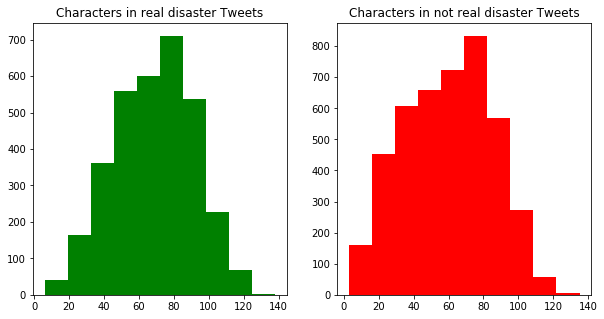

In [11]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(disaster_tweets['count'], color = 'green')
ax[0].set_title("Characters in real disaster Tweets")
ax[1].hist(not_disaster_tweets['count'], color='red')
ax[1].set_title("Characters in not real disaster Tweets")


Text(0, 0.5, 'Tweets')

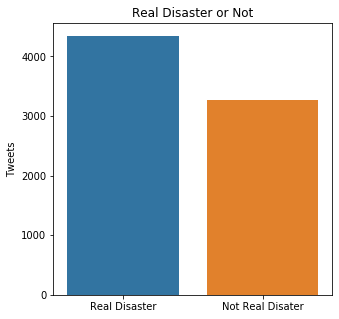

In [12]:
plt.figure(figsize=(5,5))
sns.barplot(x=['Real Disaster', 'Not Real Disater'],y=disaster)
plt.title("Real Disaster or Not")
plt.ylabel("Tweets")

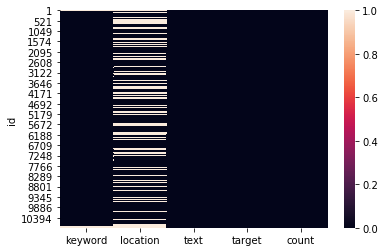

In [13]:
sns.heatmap(train.isnull())

In [14]:
train.isnull().sum()

keyword       61
location    2533
text           0
target         0
count          0
dtype: int64

In [15]:
train['keyword'].fillna("none",inplace=True)

In [16]:
keywords_count = train[['keyword','target']].groupby(['keyword']).sum().sort_values(by='target', ascending=False).reset_index()
keywords_sum = train['keyword'].groupby(train['keyword']).count().sort_values(ascending = False)
keywords_sum = pd.DataFrame(data={"keyword":keywords_sum.index,"count": keywords_sum.values})
keywords = pd.merge(keywords_count,keywords_sum, how = 'inner', on='keyword')
keywords['% of Real'] = keywords['target'] / keywords['count'] * 100
keywords_real = keywords.sort_values(by='% of Real', ascending=False)

In [17]:
keywords.head(5)

,keyword,target,count,% of Real
0,none,42,61,68.852459
1,outbreak,39,40,97.500000
2,derailment,39,39,100.000000
3,wreckage,39,39,100.000000
4,typhoon,37,38,97.368421


In [18]:
keywords_real_disaster = keywords_real.head(15)
keywords_not_real = keywords_real.tail(15)

In [19]:
keywords_not_real

,keyword,target,count,% of Real
215,epicentre,1,12,8.333333
203,panic,3,37,8.108108
206,explode,3,38,7.894737
201,wrecked,3,39,7.692308
209,blight,2,32,6.250000
210,panicking,2,33,6.060606
211,blew%20up,2,33,6.060606
208,traumatised,2,35,5.714286
214,screaming,2,36,5.555556
218,electrocute,1,32,3.125000


Text(0, 0.5, 'Keyword')

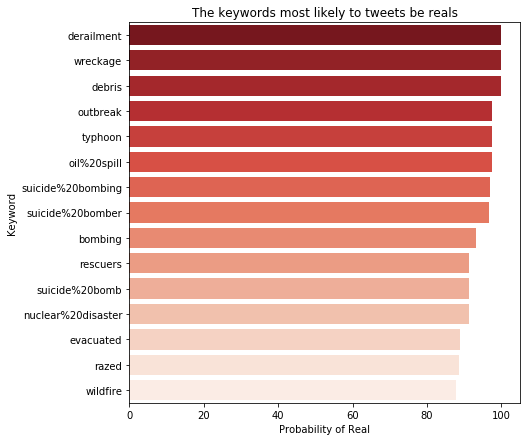

In [20]:
plt.figure(figsize=(7,7))
plt.title(("The keywords most likely to tweets be reals"))
sns.barplot(y=keywords_real_disaster['keyword'], x = keywords_real_disaster['% of Real'],palette="Reds_r")
plt.xlabel("Probability of Real")
plt.ylabel("Keyword")

Text(0, 0.5, 'Keyword')

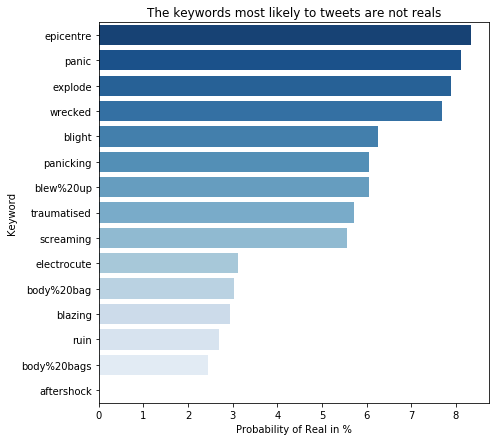

In [21]:
plt.figure(figsize=(7,7))
plt.title("The keywords most likely to tweets are not reals")
sns.barplot(y=keywords_not_real['keyword'], x = keywords_not_real['% of Real'],palette = "Blues_r")
plt.xlabel("Probability of Real in %")
plt.ylabel("Keyword")

In [22]:
keywords

,keyword,target,count,% of Real
0,none,42,61,68.852459
1,outbreak,39,40,97.500000
2,derailment,39,39,100.000000
3,wreckage,39,39,100.000000
4,typhoon,37,38,97.368421
...,...,...,...,...
217,body%20bag,1,33,3.030303
218,electrocute,1,32,3.125000
219,body%20bags,1,41,2.439024
220,ruin,1,37,2.702703


Text(0.5, 0, 'Count')

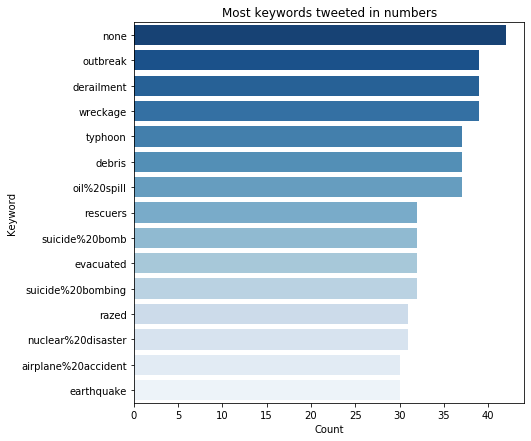

In [23]:
plt.figure(figsize=(7,7))
sns.barplot(x=keywords['target'].head(15), y=keywords['keyword'].head(15), palette= 'Blues_r')
plt.title("Most keywords tweeted in numbers")
plt.ylabel("Keyword")
plt.xlabel("Count")


In [24]:

test['keyword'].fillna('none',inplace =True)
#train['location'].fillna("none", inplace=True)

In [25]:
train.shape

(7613, 5)

In [26]:
target = train[['keyword','target']].groupby('target').count()
target['%'] = target['keyword'] / sum(target['keyword']) * 100
target

,keyword,%
target,,
0,4342,57.034021
1,3271,42.965979


In [27]:
def get_words(cols):
    text = cols[0]
    keyword = cols[1]
    if keyword != "none":
        final = str(text) + " " + str(keyword)
        return final
    else:
        return text

In [28]:
train['text'] = train[['text','keyword']].apply(lambda x: get_words(x), axis=1)
test['text'] = test[['text','keyword']].apply(lambda x: get_words(x), axis=1)

In [29]:
lista = []
for word in train['text']:
    word = word.split()
    for n in word:
        lista.append(n)

In [30]:
words = []
for word in train['text']:
    word = word.split()
    for n in word:
        words.append(n)
words = " ".join(words)

In [31]:
from wordcloud import WordCloud
from PIL import Image

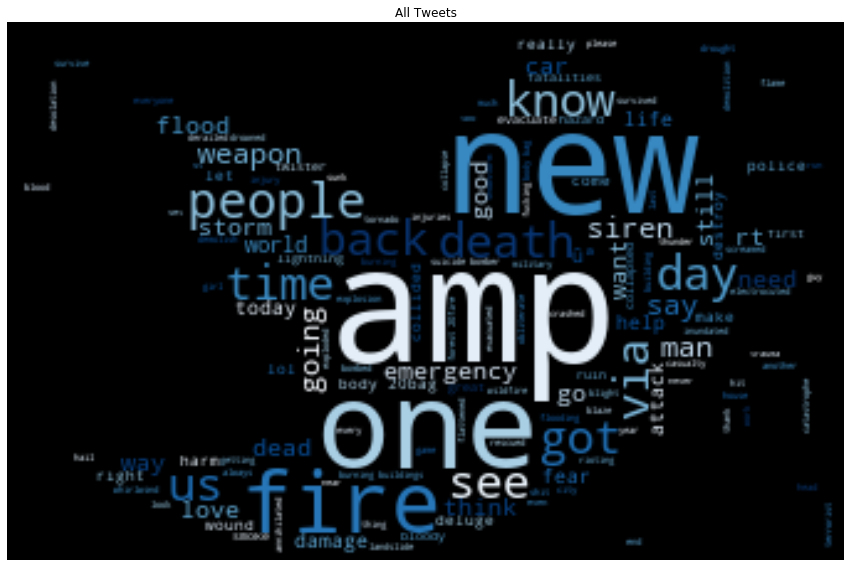

In [32]:
wave_mask = np.array(Image.open("Logo-Twitter.jpg"))
wordcloud = WordCloud(mask=wave_mask, colormap="Blues").generate(words)

plt.figure(figsize=(15,15))
plt.title("All Tweets")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [33]:
real = train[train['target']==1]
not_real = train[train['target']==0]
real_words = []

for word in real['text']:
    word = word.split()
    for n in word:
        real_words.append(n)
real_words = " ".join(real_words)

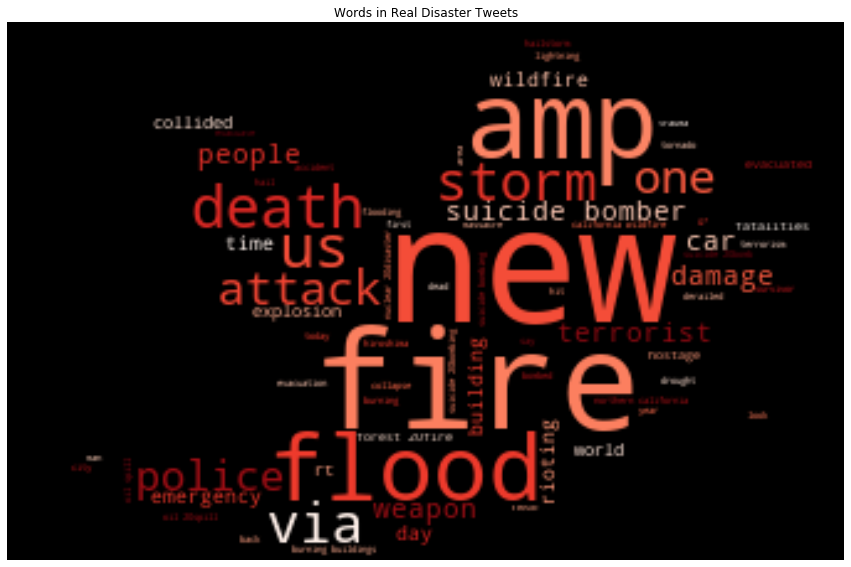

In [34]:
wave_mask = np.array(Image.open("Logo-Twitter.jpg"))
wordcloud = WordCloud(mask=wave_mask,colormap="Reds").generate(real_words)

plt.figure(figsize=(15,15))
plt.title("Words in Real Disaster Tweets")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [35]:
not_real_words = []

for word in not_real['text']:
    word = word.split()
    for n in word:
        not_real_words.append(n)
not_real_words = " ".join(not_real_words)

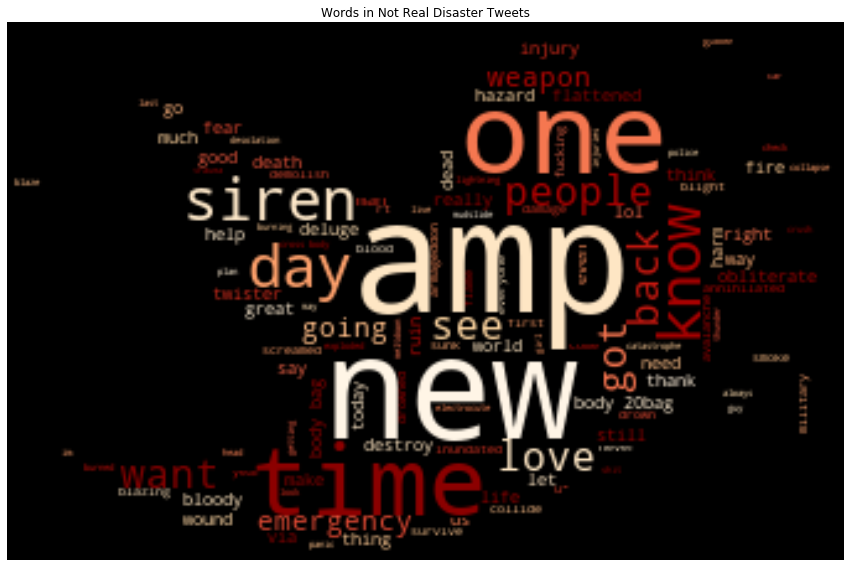

In [36]:
wave_mask = np.array(Image.open("Logo-Twitter.jpg"))
wordcloud = WordCloud(mask=wave_mask,colormap="OrRd").generate(not_real_words)

plt.figure(figsize=(15,15))
plt.title("Words in Not Real Disaster Tweets")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [37]:
x = train['text']
y = train['target']

In [38]:
xfortest = test['text']

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(x)

In [40]:
X.shape

(7613, 16867)

In [41]:
train_scores = []
scoresindex = []

In [42]:
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain,ytest = train_test_split(X,y, random_state = 0)

In [43]:
from sklearn.neural_network import MLPClassifier
classificador = MLPClassifier(random_state=0,learning_rate='constant')

In [44]:
classificador.fit(xtrain,ytrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [45]:
network_predict = classificador.predict(xtest)


In [46]:
neural_network_accuracy = accuracy_score(ytest,network_predict)
train_scores.append(neural_network_accuracy)
scoresindex.append("Neural Netword")
neural_network_accuracy

0.773109243697479

In [47]:
neural_network_matrix = confusion_matrix(ytest,network_predict)
neural_network_matrix

array([[920, 187],
       [245, 552]], dtype=int64)

In [48]:
from sklearn.ensemble import RandomForestClassifier
estimators = [100,200,300,400,500]
random_forest_list = []
for est in estimators:
    random_forest = RandomForestClassifier(random_state=0, n_estimators=est)
    random_forest.fit(xtrain,ytrain)
    random_forest_predict = random_forest.predict(xtest)
    random_forest_list.append(accuracy_score(ytest,random_forest_predict))

    

Text(0.5, 0, 'n_estimators')

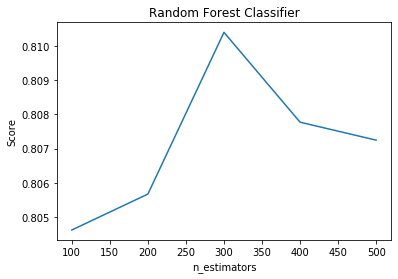

In [49]:
sns.lineplot(x=estimators,y=random_forest_list)
plt.title("Random Forest Classifier")
plt.ylabel("Score")
plt.xlabel("n_estimators")

In [50]:
random_forest = RandomForestClassifier(random_state=0, n_estimators=300)
random_forest.fit(xtrain,ytrain)
random_forest_predict = random_forest.predict(xtest)
random_forest_accuracy = accuracy_score(ytest,random_forest_predict)
train_scores.append(random_forest_accuracy)
scoresindex.append("Random Forest")
random_forest_accuracy

0.8103991596638656

In [51]:
random_forest_matrix = confusion_matrix(ytest,random_forest_predict)

In [52]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
nb_predict = nb.predict(xtest)

In [53]:
nb_matrix = confusion_matrix(ytest,nb_predict)

In [54]:
nb_accuracy = accuracy_score(ytest,nb_predict)
train_scores.append(nb_accuracy)
scoresindex.append("MultinomialNB")
nb_accuracy

0.7967436974789915

In [55]:
from sklearn.svm import SVC
regularization = [1,2,3,4,5]
svc_list = []
for n in regularization:
    svc = SVC(random_state = 0, C=n)
    svc.fit(xtrain,ytrain)
    svc_predict = svc.predict(xtest)
    svc_list.append(accuracy_score(ytest,svc_predict))

Text(0, 0.5, 'Score')

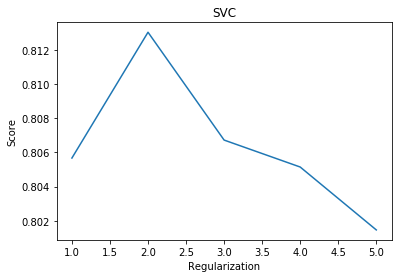

In [56]:
sns.lineplot(x=regularization,y=svc_list)
plt.title("SVC")
plt.xlabel("Regularization")
plt.ylabel("Score")

In [57]:
svc = SVC(random_state = 0, C=2)
svc.fit(xtrain,ytrain)
svc_predict = svc.predict(xtest)
svc_score_accuracy = accuracy_score(ytest,svc_predict)
train_scores.append(svc_score_accuracy)
scoresindex.append("SVC")
svc_score_accuracy

0.8130252100840336

In [58]:
svc_matrix = confusion_matrix(ytest,svc_predict)

In [59]:
from sklearn.linear_model import LogisticRegression
c = [1,2,3,4,5]
lr_scores = []
for i in c:
    lr = LogisticRegression(random_state = 0,max_iter=100, C=i)
    lr.fit(xtrain,ytrain)
    lr_predict = lr.predict(xtest)
    lr_accuracy = accuracy_score(ytest,lr_predict)
    lr_scores.append(lr_accuracy)

Text(0, 0.5, 'Score')

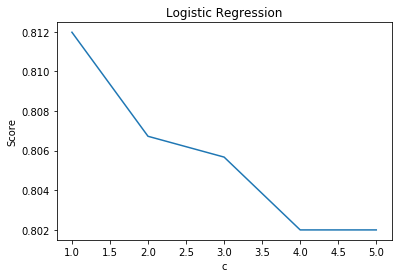

In [60]:
sns.lineplot(x=c,y=lr_scores)
plt.title("Logistic Regression")
plt.xlabel("c")
plt.ylabel("Score")

In [61]:
lr = LogisticRegression(random_state = 0,max_iter=100, C=1)
lr.fit(xtrain,ytrain)
lr_predict = lr.predict(xtest)
lr_accuracy = accuracy_score(ytest,lr_predict)
train_scores.append(lr_accuracy)
scoresindex.append("Logistic Regression")
lr_accuracy

0.8119747899159664

In [62]:
lr_matrix = confusion_matrix(ytest,lr_predict)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = [2,3,4,5,6]
knn_list = []
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(xtrain,ytrain)
    knn_predict = knn.predict(xtest)
    knn_accuracy = accuracy_score(ytest,knn_predict)
    knn_list.append(knn_accuracy)

Text(0, 0.5, 'score')

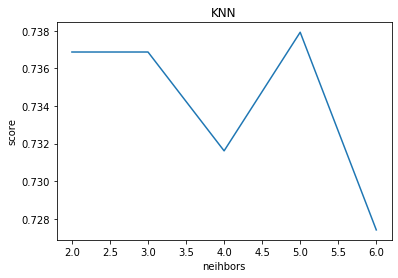

In [64]:
sns.lineplot(x=neighbors,y=knn_list)
plt.title("KNN")
plt.xlabel("neihbors")
plt.ylabel("score")

In [65]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
knn_predict = knn.predict(xtest)
knn_accuracy = accuracy_score(ytest,knn_predict)
train_scores.append(knn_accuracy)
scoresindex.append("Kneighbors Classifier")
knn_accuracy

0.7379201680672269

In [66]:
knn_matrix = confusion_matrix(ytest,knn_predict)

In [67]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
Xtrain = xtrain.toarray()
Xtest= xtest.toarray()
gnb.fit(Xtrain,ytrain)
gnb_predict = gnb.predict(Xtest)

In [68]:
gnb_accuracy = accuracy_score(ytest,gnb_predict)
train_scores.append(gnb_accuracy)
scoresindex.append("Gaussian NB")
gnb_accuracy

0.6276260504201681

In [69]:
train_scores100 = []
for n in train_scores:
    train_scores100.append(n*100)

In [70]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

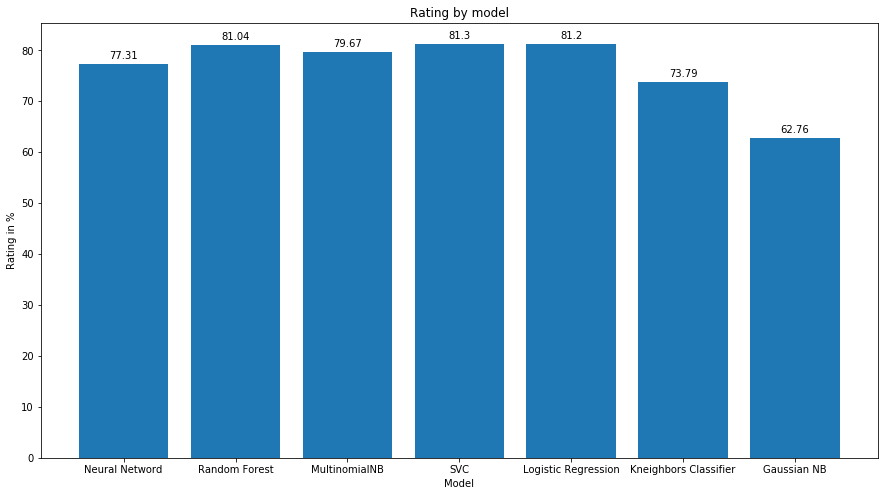

In [71]:
fig, ax = plt.subplots(figsize=(15,8))
rect1 = ax.bar(x=scoresindex, height=train_scores100)
plt.title('Rating by model')
plt.ylabel('Rating in %')
plt.xlabel('Model')
autolabel(rect1)

Text(0.5, 1, 'KNN')

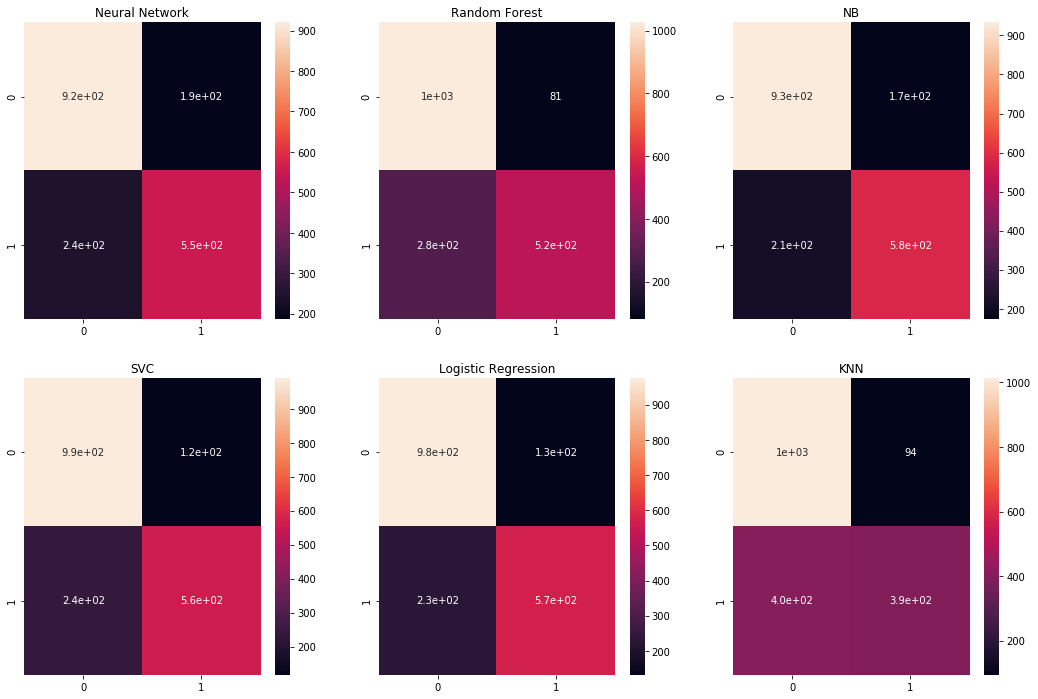

In [72]:
fig,ax=plt.subplots(2,3,figsize=(18,12))
ax[0,0] = sns.heatmap(neural_network_matrix, annot=True, ax=ax[0,0])
ax[0,0].set_title('Neural Network')
ax[0,1] = sns.heatmap(random_forest_matrix,annot=True, ax=ax[0,1])
ax[0,1].set_title('Random Forest')
ax[0,2] = sns.heatmap(nb_matrix,annot=True, ax=ax[0,2])
ax[0,2].set_title('NB')
ax[1,0] = sns.heatmap(svc_matrix,annot=True, ax=ax[1,0])
ax[1,0].set_title('SVC')
ax[1,1] = sns.heatmap(lr_matrix,annot=True, ax=ax[1,1])
ax[1,1].set_title('Logistic Regression')
ax[1,2] = sns.heatmap(knn_matrix,annot=True, ax=ax[1,2])
ax[1,2].set_title('KNN')

In [73]:
X = cv.fit_transform(x)
xfortest = cv.transform(xfortest)

In [74]:
X.shape

(7613, 16867)

In [75]:
xfortest.shape

(3263, 16867)

In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)
predictfinal = model.predict(xfortest)

In [77]:
predictfinal

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [78]:
output = pd.DataFrame({'id': test.index,'target': predictfinal})
output.to_csv('submission.csv', index=False)

In [79]:
output

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
